In [7]:
import pandas as pd
import numpy as np
%matplotlib inline
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from flask import request
from scipy import optimize
from scipy import integrate

In [8]:
mpl.rcParams['figure.figsize'] = (16,9)
pd.set_option('display.max_rows',500)
sns.set(style="darkgrid")

## Fitting the parameters of SIR model

In [9]:

#df_analyse.sort_values('date', ascending=True).tail()

In [10]:

#t = np.arange(len(ydata))
#print(ydata)

In [28]:
I0 = 20
N0 = 1000000#5000000
S0 = 1000000#N0 - I0
R0 = 0
beta = 0.4
gamma = 0.1
t = 0

In [146]:
def Handle_SIR_Modelling(ydata):
    global t
    t = np.arange(len(ydata))

    global I0
    I0 = ydata[0]   #Infected population
    #S0 = 1000000    #Suspected population
    #R0 = 0          #Recovered population
    #beta = 0.4      #Rate of infection
    #gamma = 0.1     #Rate of recovery
    #print(t)
    #print(ydata)
    popt, pcov = optimiz
    _odeint, t, ydata, maxfev=10000)
    #perr = np.sqrt(np.diag(pcov))
    #print(popt)
    #print(t)
    fitted = fit_odeint(t, *popt)
    return t, ydata, fitted

In [147]:
def SIR_model_fit(SIR, time, beta, gamma):
    '''
    Simple SIR model implementation.
    S: Suspected population
    I: Infected population
    R: Recoered population
    beta: rate of infection
    gamma: rate of recovery
    time: for integral as define in odeint function of scipy.integrate
    as per slides: ds+dI+dR = 0 and S+R+I=N (total population)
    
    Make a note tht in this model a recovered person can not get infected again.
    '''
    
    S,I,R = SIR
    dS_dt = -beta*S*I/N0
    dI_dt = beta*S*I/N0 - gamma*I
    dR_dt = gamma*I
    
    return dS_dt, dI_dt, dR_dt


In [148]:
def fit_odeint(x, beta, gamma):
    return integrate.odeint(SIR_model_fit, (S0, I0, R0), t, args=(beta, gamma))[:,1]  #we are only fetching dI

In [149]:
#popt=[0.4,0.1]
#fit_odeint(t, *popt)

In [150]:
#print(t)
#print(ydata)
#popt, pcov = optimize.curve_fit(fit_odeint, t, ydata, maxfev=5000)
#perr = np.sqrt(np.diag(pcov))

#print('standard deviation error: ', str(perr), 'start infect: ',ydata[0])
#print('optimal parameters -> beta: ', popt[0], 'and gamma: ',popt[1])

In [151]:
#print(popt)
#print(t)
#fitted = fit_odeint(t, *popt)
#print(fitted)

In [197]:
import warnings
warnings.filterwarnings('ignore')
df_analyse = pd.read_csv('../data/processed/COVID_full_flat_table.csv', sep=';')
df_analyse_test = df_analyse.drop(['date'],axis=1)
final_dataframe = pd.DataFrame()
start_count = 0
total_rows = len(df_analyse.US)
for each_country in df_analyse_test:
    #if each_country == 'Germany':
    print(each_country)
    temp_fitted = np.full(total_rows, np.NaN)
    final_dataframe[each_country] = temp_fitted
        #print(final_dataframe[each_country])
    nonzero_row = (df_analyse_test[each_country] > start_count).idxmax(1)
    ydata = np.array(df_analyse_test[each_country][nonzero_row:])
        #print(temp_fitted)
    t, ydata, fitted = Handle_SIR_Modelling(ydata)
        #print(len(fitted))
        #fitted = np.reshape(fitted,total_rows)
        #fitted[fitted == 0] = 'nan'
        #print(fitted)
        #temp_fitted[:len(fitted)] = fitted
        #print(fitted)
    final_dataframe[each_country].iloc[0:len(fitted)] = fitted

#final_dataframe

final_dataframe.to_csv('../data/processed/COVID_SIR_Model_Data_WithNA.csv',sep=';', index = False)

    #np.put(temp_fitted,[total_rows-t,total_rows],fitted)

    

#ydata = np.array(df_analyse.US[35:])
#t, ydata, fitted = Handle_SIR_Modelling(ydata)
#print(len(fitted))

#plt.figure(figsize=(20,10))
#plt.semilogy(t, ydata, 'o')
#plt.semilogy(t, fitted, 'x')
#plt.title("Fit of SIR model for Germany case")
#plt.ylabel("Population Infected")
#plt.xlabel("Days")
#plt.show()
#print('optimal parameters -> beta: ', popt[0], 'and gamma: ',popt[1])
#print("Basic Reproduction Number R0 " , popt[0]/ popt[1])

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burma
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Denmark
Diamond Princess
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Holy See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Korea, South
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
MS Zaandam
Madagascar
Malawi
Malaysia
Maldives
Mali
Mal

In [200]:
final_dataframe.Kosovo.tail()

218   NaN
219   NaN
220   NaN
221   NaN
222   NaN
Name: Kosovo, dtype: float64

223
171


ValueError: x and y must have same first dimension, but have shapes (171,) and (223,)

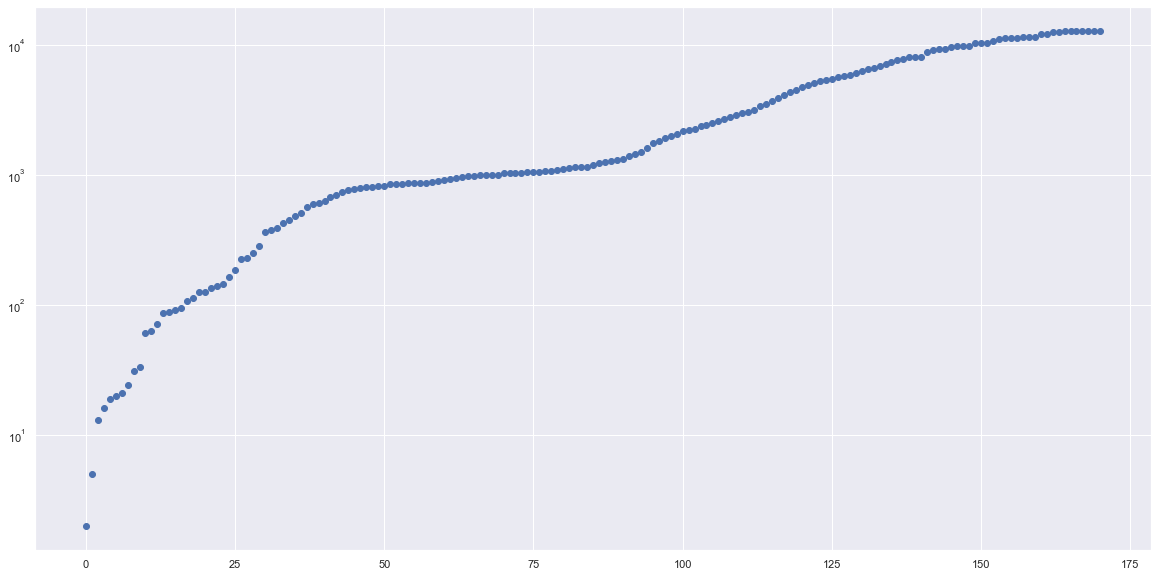

In [195]:
#df_SIR_data = pd.read_csv('../data/processed/COVID_SIR_Model_Data.csv', sep=';')
#np.array(df_SIR_data['US'])
#final_dataframe.US
ydata = np.array(df_analyse['Kosovo'][52:])
fitted = np.array(final_dataframe['Kosovo'])
print(len(fitted))
print(len(ydata))
plt.figure(figsize=(20,10))
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted, 'x')
plt.title("Fit of SIR model for Germany case")
plt.ylabel("Population Infected")
plt.xlabel("Days")
plt.show()
print('optimal parameters -> beta: ', popt[0], 'and gamma: ',popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])

In [175]:
#final_dataframe.to_csv('../data/processed/COVID_SIR_Model_Data.csv',sep=';', index = False)


0           1.000000
1           1.092183
2           1.192864
3           1.302825
4           1.422924
5           1.554093
6           1.697354
7           1.853821
8           2.024711
9           2.211355
10          2.415203
11          2.637843
12          2.881007
13          3.146585
14          3.436645
15          3.753444
16          4.099445
17          4.477341
18          4.890073
19          5.340850
20          5.833180
21          6.370894
22          6.958174
23          7.599590
24          8.300131
25          9.065249
26          9.900894
27         10.813568
28         11.810370
29         12.899056
30         14.088095
31         15.386735
32         16.805080
33         18.354162
34         20.046030
35         21.893846
36         23.911981
37         26.116133
38         28.523445
39         31.152642
40         34.024169
41         37.160361
42         40.585605
43         44.326538
44         48.412249
45         52.874506
46         57.748005
47         63

In [53]:
df_analyse = pd.read_csv('../data/processed/COVID_full_flat_table.csv', sep=';')
#df_analyse.head()
df_analyse = df_analyse.drop(['date'],axis=1)
abc = pd.DataFrame()
for each_country in df_analyse:
    abc[each_country] = np.array(df_analyse.US[35:])

In [173]:
a = np.array([1, 2,3,4])
b = np.array([11, 22])
#np.pad(a,(2,2),'constant')
a[:len(b)] = b
a

array([11, 22,  3,  4])

In [ ]:
    if each_country == 'Kosovo':
        temp_fitted = np.full(total_rows, 0)
        nonzero_row = (df_analyse[each_country] > start_count).idxmax(1)
        print(nonzero_row)
        ydata = np.array(df_analyse[each_country][nonzero_row:])
        #print(ydata)
        t, ydata, fitted = Handle_SIR_Modelling(ydata)
        #print(fitted)
        final_dataframe[each_country] = temp_fitted
        final_dataframe[each_country].iloc[(total_rows-len(t)):total_rows] = fitted
        print(fitted)


In [ ]:
for each_country in df_analyse_test:
    

        #final_dataframe[each_country].iloc[0:len(fitted)] = fitted
